In [2]:
!pip install keras
!pip install tensorflow
import numpy as np 
import pandas as pd 
import keras
from sklearn import metrics
import sklearn.datasets
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
df_corrosion=pd.read_excel("Naptha corrosion.xlsx")


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
df_corrosion.head()

,Hydrocarbon,H2S Mole,Temperature,Corrosion rate
0,Naphtha,0.002,218,0.03
1,Naphtha,0.002,246,0.03
2,Naphtha,0.002,274,0.03
3,Naphtha,0.002,302,0.03
4,Naphtha,0.002,329,0.03


In [3]:
df_corrosion.shape

(96, 4)

In [4]:
# statistical information about the dataset
df_corrosion.describe()

,H2S Mole,Temperature,Corrosion rate
count,96.000000,96.000000,96.000000
mean,0.272313,371.083333,0.661562
std,0.367118,96.449350,0.887658
min,0.002000,218.000000,0.030000
25%,0.006875,295.000000,0.080000
50%,0.057500,371.000000,0.280000
75%,0.412500,447.750000,0.827500
max,1.000000,524.000000,4.320000


In [5]:
df_corrosion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hydrocarbon     96 non-null     object 
 1   H2S Mole        96 non-null     float64
 2   Temperature     96 non-null     int64  
 3   Corrosion rate  96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
#check for missing values
df_corrosion.isnull().sum()

Hydrocarbon       0
H2S Mole          0
Temperature       0
Corrosion rate    0
dtype: int64

In [7]:
# Normalizing the dataset to scale down the data between 0 and 1

In [8]:
df_corrosion = df_corrosion.drop(['Hydrocarbon'], axis = 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaling = MinMaxScaler()

In [11]:
scaling.fit_transform(df_corrosion[['H2S Mole','Temperature', 'Corrosion rate']])

array([[0.        , 0.        , 0.        ],
       [0.        , 0.09150327, 0.        ],
       [0.        , 0.18300654, 0.        ],
       [0.        , 0.2745098 , 0.        ],
       [0.        , 0.3627451 , 0.        ],
       [0.        , 0.45424837, 0.004662  ],
       [0.        , 0.54575163, 0.01165501],
       [0.        , 0.6372549 , 0.01631702],
       [0.        , 0.72875817, 0.02797203],
       [0.        , 0.81699346, 0.03962704],
       [0.        , 0.90849673, 0.05827506],
       [0.        , 1.        , 0.07692308],
       [0.00150301, 0.        , 0.        ],
       [0.00150301, 0.09150327, 0.        ],
       [0.00150301, 0.18300654, 0.        ],
       [0.00150301, 0.2745098 , 0.004662  ],
       [0.00150301, 0.3627451 , 0.01165501],
       [0.00150301, 0.45424837, 0.02331002],
       [0.00150301, 0.54575163, 0.03496503],
       [0.00150301, 0.6372549 , 0.04662005],
       [0.00150301, 0.72875817, 0.06993007],
       [0.00150301, 0.81699346, 0.1002331 ],
       [0.

In [12]:
X = df_corrosion[['H2S Mole', 'Temperature']]
y = df_corrosion['Corrosion rate']

In [13]:
print(X.shape)
print(y.shape)


(96, 2)
(96,)


<function matplotlib.pyplot.show(close=None, block=None)>

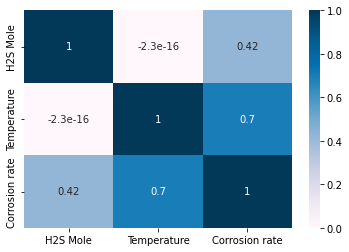

In [14]:
#Data Correlation
cor = df_corrosion.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.PuBu)
plt.show

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [16]:
print("X_train shape is:", X_train.shape)
print("X_test shape is:", X_test.shape)
print("y_train shape is:", y_train.shape)
print("y_test shape is:", y_test.shape)

X_train shape is: (76, 2)
X_test shape is: (20, 2)
y_train shape is: (76,)
y_test shape is: (20,)


In [17]:
from sklearn.linear_model import LinearRegression
lr_corrosion = LinearRegression()
lr_corrosion.fit(X_train, y_train)

LinearRegression()

In [18]:
coeff_df = pd.DataFrame(lr_corrosion.coef_,X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
H2S Mole,1.073832
Temperature,0.006491


In [19]:
print(lr_corrosion.intercept_)

-2.028909941629517


Linear regression equation is y = B0+B1x1+B2x2+...+Bnxn
B0 = intercept
B1 = first coefficient
B2 = second coefficient


In [20]:
lr_corrosion.score(X_train, y_train)

0.6831779252073151

In [21]:
# prediction on training data
training_data_prediction =(lr_corrosion.predict(X_train))
training_data_prediction


array([ 0.68954194,  0.07182979, -0.06641829,  0.82351194,  1.04655823,
       -0.52792066,  0.47235175,  2.44631326,  1.63908531,  0.73680778,
       -0.2916777 ,  1.45733156,  0.64175819,  1.72578947,  0.01734058,
       -0.0599753 ,  0.4739625 ,  0.91961812,  0.25358354,  0.37330028,
       -0.42992578, -0.10992395,  0.5077882 ,  0.32603445,  0.10884426,
       -0.06480754,  0.29220875,  0.1442807 , -0.21273559,  0.29059801,
        1.00526568,  1.45838815, -0.61167953,  1.19931853,  0.11528725,
       -0.16441317,  1.37462929,  1.38107228,  1.37624003,  0.19260312,
        1.19287554,  0.66054849,  1.36228197,  1.09488066,  0.91207032,
        0.84230224,  1.9961016 , -0.24656129,  0.55505403,  0.65571625,
        0.29704099, -0.34616691,  2.08280576,  2.26455951,  1.33112362,
        0.83747   ,  1.54403572,  0.19154653,  1.09382407, -0.42348279,
       -0.39448934,  1.22831198, -0.03098184,  0.61059983,  1.27663441,
       -0.61006878,  1.51287736, -0.57624308,  1.01273254,  2.17

In [22]:
dfr1=pd.DataFrame({'Actual value':y_train, 'Predicted value':training_data_prediction, 'Variance':training_data_prediction - y_train, 'pcchange':((training_data_prediction - y_train)/y_train)*100})
dfr1

,Actual value,Predicted value,Variance,pcchange
43,0.56,0.689542,0.129542,23.132490
62,0.13,0.071830,-0.058170,-44.746313
3,0.03,-0.066418,-0.096418,-321.394284
86,0.18,0.823512,0.643512,357.506631
45,1.04,1.046558,0.006558,0.630599
...,...,...,...,...
92,1.91,1.907543,-0.002457,-0.128627
67,0.99,0.974107,-0.015893,-1.605321
64,0.30,0.428846,0.128846,42.948695
47,1.78,1.410066,-0.369934,-20.782824


In [23]:
# R squared
from sklearn import metrics
error_score = metrics.r2_score(y_train, training_data_prediction) # should be as low as possible

#Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print(metrics.mean_squared_error(y_train, training_data_prediction))
print('R squared error: ', error_score)
print('mean absolute error: ', score_2)

0.2643716263109368
R squared error:  0.6831779252073151
mean absolute error:  0.39369029711865333


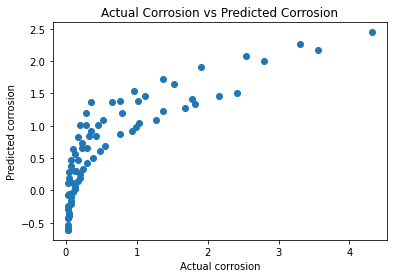

In [63]:

plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual corrosion')
plt.ylabel('Predicted corrosion')
plt.title('Actual Corrosion vs Predicted Corrosion')
plt.show()
#plt.plot(x_pred, y_pred, color = 'blue')

#plt.xlabel('Actual ')
#plt.ylabel('Predicted')
#plt.title('Actual  vs Predicted')
#plt.show()






In [25]:
#ax = sns.regplot(x=y_train, y=training_data_prediction, ci = None, color = 'green')
#ax.set_xlabel('Actual')
#ax.set_ylabel('Predicted')
#ax.set_title('Actual Values vs Predicted Values')

<AxesSubplot:>

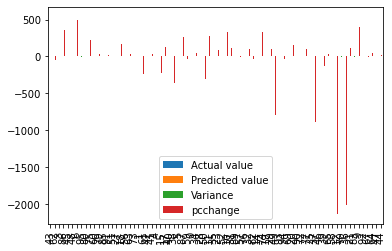

In [26]:
graph = dfr1
graph.plot(kind='bar')

In [27]:
#Prediction on test data
test_data_prediction = lr_corrosion.predict(X_test)
print(test_data_prediction)

[-0.24172904  0.46000444 -0.24817203  0.73786437  1.15586107  1.81434785
  0.110455    1.27557781  0.55611062  0.79235358  0.37435687  1.18052823
  1.69463111 -0.42831503  0.6541055   0.47879474  1.19448629 -0.60523654
  1.01756478  0.83585925]


In [28]:
dfr2=pd.DataFrame({'Actual value':y_test, 'Predicted value':test_data_prediction, 'Variance':test_data_prediction - y_test, 'pcchange':((test_data_prediction - y_test)/y_test)*100})
dfr2

,Actual value,Predicted value,Variance,pcchange
26,0.05,-0.241729,-0.291729,-583.458086
84,0.05,0.460004,0.410004,820.008881
2,0.03,-0.248172,-0.278172,-927.240109
55,0.69,0.737864,0.047864,6.936865
68,1.35,1.155861,-0.194139,-14.380661
81,2.06,1.814348,-0.245652,-11.924862
16,0.08,0.110455,0.030455,38.068756
78,0.79,1.275578,0.485578,61.465546
54,0.48,0.556111,0.076111,15.856379
66,0.69,0.792354,0.102354,14.833852


In [29]:
#ax = sns.regplot(x=y_test, y=test_data_prediction, ci = None, color = 'green')
#ax.set_xlabel('Actual')
#ax.set_ylabel('Predicted')
#ax.set_title('Actual Values vs Predicted Values')

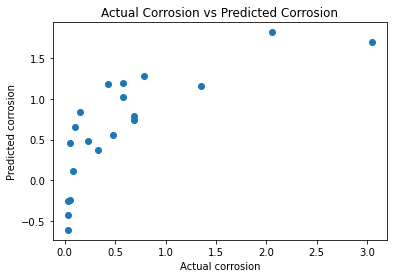

In [62]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual corrosion')
plt.ylabel('Predicted corrosion')
plt.title('Actual Corrosion vs Predicted Corrosion')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


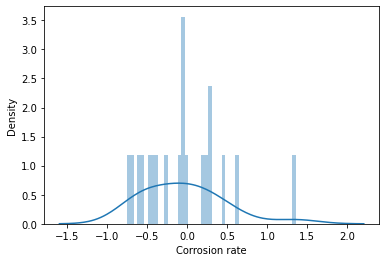

In [31]:
sns.distplot((y_test-test_data_prediction),bins=50); 

<AxesSubplot:>

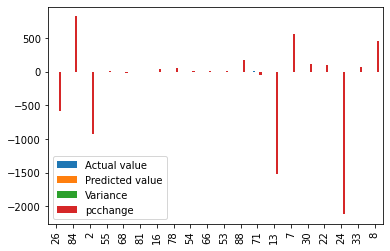

In [32]:
graph = dfr2
graph.plot(kind='bar')

In [33]:
#Finding the error value for the test data
# R squared error
from sklearn import metrics
score_1 = metrics.r2_score(y_test, test_data_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)
print('mean squared error: ', metrics.mean_squared_error(y_test, test_data_prediction))
print('R squared error: ', score_1)
print('mean absolute error: ', score_2)

mean squared error:  0.2554075763844437
R squared error:  0.5480703736811996
mean absolute error:  0.39733370455736045


XGBoost Regressor

In [37]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [38]:
from xgboost import XGBRegressor

In [40]:
model = XGBRegressor()

In [41]:
# training the model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
# Evaluation. Prediction on training data
# accuracy for prediction on training data
training_data_predictionxg = model.predict(X_train)


In [43]:
print(training_data_predictionxg)

[0.55817485 0.12790251 0.02881226 0.17857331 1.037033   0.02840787
 0.08077738 4.3179703  1.5166656  0.22628425 0.03261207 1.1204045
 0.10105393 1.3711822  0.12595962 0.05602009 0.17556766 0.9438945
 0.20318149 0.07935172 0.02995326 0.07777402 0.38218775 0.25788936
 0.03048012 0.04826642 0.13032909 0.1793597  0.07746872 0.05019359
 0.28029516 2.1597466  0.0306488  0.7886448  0.09681423 0.08277278
 0.36053124 1.0200557  0.76007605 0.19917573 0.27975538 0.3002018
 0.66002434 1.2707077  0.35959974 0.42956793 2.7941506  0.03299022
 0.13246727 0.23290232 0.14713305 0.05078392 2.5406957  3.2982411
 1.8303674  0.33073488 0.96910626 0.04949995 0.53367805 0.03048898
 0.04901886 1.3741364  0.09974379 0.4721621  1.6791618  0.0280382
 2.4071195  0.0314444  0.4589308  3.5599785  0.20140049 1.9100723
 0.9901228  0.3057564  1.7792666  0.7580586 ]


In [44]:
dfxgb=pd.DataFrame({'Actual value':y_train, 'Predicted value':training_data_predictionxg, 'Variance':training_data_predictionxg - y_train, 'pcchange':((training_data_predictionxg - y_train)/y_train)*100})
dfxgb

,Actual value,Predicted value,Variance,pcchange
43,0.56,0.558175,-0.001825,-0.325920
62,0.13,0.127903,-0.002097,-1.613456
3,0.03,0.028812,-0.001188,-3.959148
86,0.18,0.178573,-0.001427,-0.792605
45,1.04,1.037033,-0.002967,-0.285292
...,...,...,...,...
92,1.91,1.910072,0.000072,0.003787
67,0.99,0.990123,0.000123,0.012404
64,0.30,0.305756,0.005756,1.918797
47,1.78,1.779267,-0.000733,-0.041202


In [45]:
# R squared error 
score_1xgb = metrics.r2_score(y_train, training_data_predictionxg)

#Mean absolute error
score_2xgb = metrics.mean_absolute_error(y_train, training_data_predictionxg)
print('mean squared error: ', metrics.mean_squared_error(y_train, training_data_predictionxg))
print('R squared error: ', score_1xgb)
print('mean absolute error: ', score_2xgb)

mean squared error:  6.152460026789379e-06
R squared error:  0.999992626912434
mean absolute error:  0.0017818850474922293


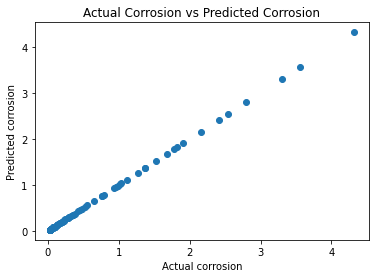

In [56]:
plt.scatter(y_train, training_data_predictionxg)
plt.xlabel('Actual corrosion')
plt.ylabel('Predicted corrosion')
plt.title('Actual Corrosion vs Predicted Corrosion')
plt.show()

<AxesSubplot:>

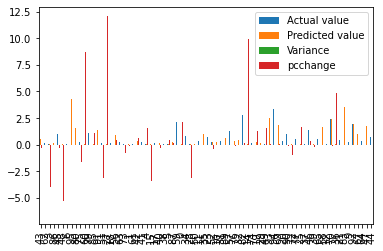

In [47]:
graph = dfxgb
graph.plot(kind='bar')

On the test data

In [50]:
#Prediction on test data
test_data_predictionxgb = model.predict(X_test)
print(test_data_predictionxgb)

[0.04154312 0.10004539 0.03560868 0.58719593 1.32587    2.1640077
 0.07908929 0.7560466  0.37557888 0.642261   0.26386547 0.3121358
 2.834997   0.0286853  0.19403552 0.20499739 0.61055076 0.02823402
 0.5350479  0.1971078 ]


In [51]:
dfxgbtest=pd.DataFrame({'Actual value':y_test, 'Predicted value':test_data_predictionxgb, 'Variance':test_data_predictionxgb - y_test, 'pcchange':((test_data_predictionxgb - y_test)/y_test)*100})
dfxgbtest

,Actual value,Predicted value,Variance,pcchange
26,0.05,0.041543,-0.008457,-16.913763
84,0.05,0.100045,0.050045,100.090781
2,0.03,0.035609,0.005609,18.695584
55,0.69,0.587196,-0.102804,-14.899140
68,1.35,1.325870,-0.024130,-1.787405
81,2.06,2.164008,0.104008,5.048916
16,0.08,0.079089,-0.000911,-1.138386
78,0.79,0.756047,-0.033953,-4.297900
54,0.48,0.375579,-0.104421,-21.754400
66,0.69,0.642261,-0.047739,-6.918692


In [49]:
# R squared error 
score_1xgbtest = metrics.r2_score(y_test, test_data_predictionxgb)

#Mean absolute error
score_2xgbtest = metrics.mean_absolute_error(y_test, test_data_predictionxgb)
print('mean squared error: ', metrics.mean_squared_error(y_test, test_data_predictionxgb))
print('R squared error: ', score_1xgbtest)
print('mean absolute error: ', score_2xgbtest)

mean squared error:  0.005902519665113834
R squared error:  0.9895558168463293
mean absolute error:  0.05629040683433413


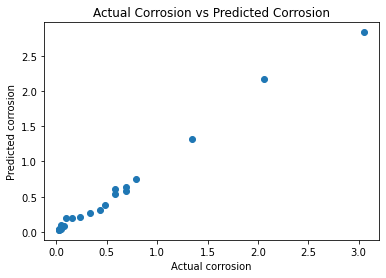

In [61]:
plt.scatter(y_test, test_data_predictionxgb)
plt.xlabel('Actual corrosion')
plt.ylabel('Predicted corrosion')
plt.title('Actual Corrosion vs Predicted Corrosion')
plt.show()

<AxesSubplot:>

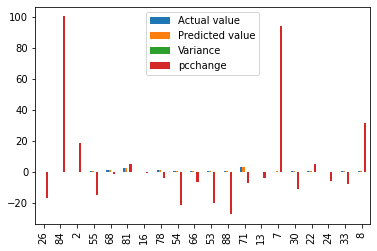

In [53]:
graph = dfxgbtest
graph.plot(kind='bar')